In [41]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def get_plot_by_one(directory,MODEL_NAME):
  datas = []
  for txt_name in os.listdir(directory):
    with open(directory+txt_name, "r") as f:
      txt = f.read()
      datas.append(txt)
  Precision_list = []
  Recall_list = []
  F1_list = []
  Accuracy_list = []
  for data in datas:
    data = data.split("\n")[:4]
    Precision = float(data[0][data[0].find(": ")+2:].strip())
    Recall = float(data[1][data[1].find(": ")+2:].strip())
    F1 = float(data[2][data[2].find(": ")+2:].strip())
    Accuracy = float(data[3][data[3].find(": ")+2:].strip())
    Precision_list.append(Precision)
    Recall_list.append(Recall)
    F1_list.append(F1)
    Accuracy_list.append(Accuracy)
  # 평균 및 표준 편차 계산
  precision_mean = sum(Precision_list) / len(Precision_list)
  recall_mean = sum(Recall_list) / len(Recall_list)
  f1_mean = sum(F1_list) / len(F1_list)
  accuracy_mean = sum(Accuracy_list) / len(Accuracy_list)

  precision_std = (sum([(x - precision_mean) ** 2 for x in Precision_list]) / len(Precision_list)) ** 0.5
  recall_std = (sum([(x - recall_mean) ** 2 for x in Recall_list]) / len(Recall_list)) ** 0.5
  f1_std = (sum([(x - f1_mean) ** 2 for x in F1_list]) / len(F1_list)) ** 0.5
  accuracy_std = (sum([(x - accuracy_mean) ** 2 for x in Accuracy_list]) / len(Accuracy_list)) ** 0.5

  # 플롯
  metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
  means = [precision_mean, recall_mean, f1_mean, accuracy_mean]
  stds = [precision_std, recall_std, f1_std, accuracy_std]

  plt.figure(figsize=(10, 5))
  plt.bar(metrics, means, yerr=stds, capsize=5)
  plt.ylabel('Score')
  plt.ylim(0, 1)
  plt.title(MODEL_NAME+' Test Scores', fontsize = 20)
  plt.grid(axis='y')

  # 결과 저장
  plot_directory = 'plots'
  if not os.path.exists(plot_directory):
      os.makedirs(plot_directory)
  plt.savefig(os.path.join(plot_directory, MODEL_NAME+'evaluation_metrics_summary.png'))
  plt.show()

  # 각 메트릭의 시계열 플롯
  plt.figure(figsize=(15, 8))
  plt.subplot(2, 2, 1)
  plt.plot(Precision_list, label='Precision', marker='o')
  plt.title('Precision over Runs')
  plt.xlabel('Run')
  plt.ylabel('Precision')
  plt.grid()
  plt.ylim(0, 1)

  plt.subplot(2, 2, 2)
  plt.plot(Recall_list, label='Recall', marker='o')
  plt.title('Recall over Runs')
  plt.xlabel('Run')
  plt.ylabel('Recall')
  plt.grid()
  plt.ylim(0, 1)

  plt.subplot(2, 2, 3)
  plt.plot(F1_list, label='F1 Score', marker='o')
  plt.title('F1 Score over Runs')
  plt.xlabel('Run')
  plt.ylabel('F1 Score')
  plt.grid()
  plt.ylim(0, 1)

  plt.subplot(2, 2, 4)
  plt.plot(Accuracy_list, label='Accuracy', marker='o')
  plt.title('Accuracy over Runs')
  plt.xlabel('Run')
  plt.ylabel('Accuracy')
  plt.grid()
  plt.ylim(0, 1)

  plt.tight_layout()
  plt.savefig(os.path.join(plot_directory, MODEL_NAME+'metrics_over_runs.png'))
  plt.show()

In [42]:
HYBRID = "C:/Users/admin/Desktop/졸프&고급딥러닝/졸프/06-1processResults/Ablation/test_results/Hybrid/"
STRING = "C:/Users/admin/Desktop/졸프&고급딥러닝/졸프/06-1processResults/Ablation/test_results/String/"
WORD = "C:/Users/admin/Desktop/졸프&고급딥러닝/졸프/06-1processResults/Ablation/test_results/Word/"

## Hybrid 다양하게 시도해본거 test metric 총집합

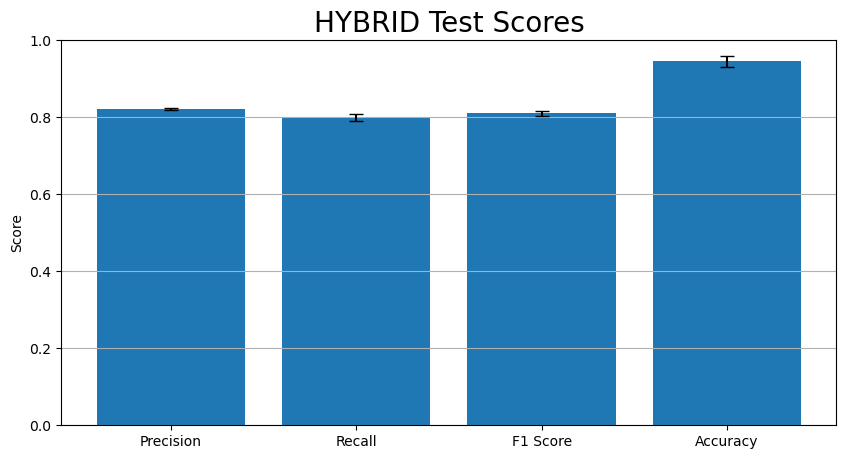

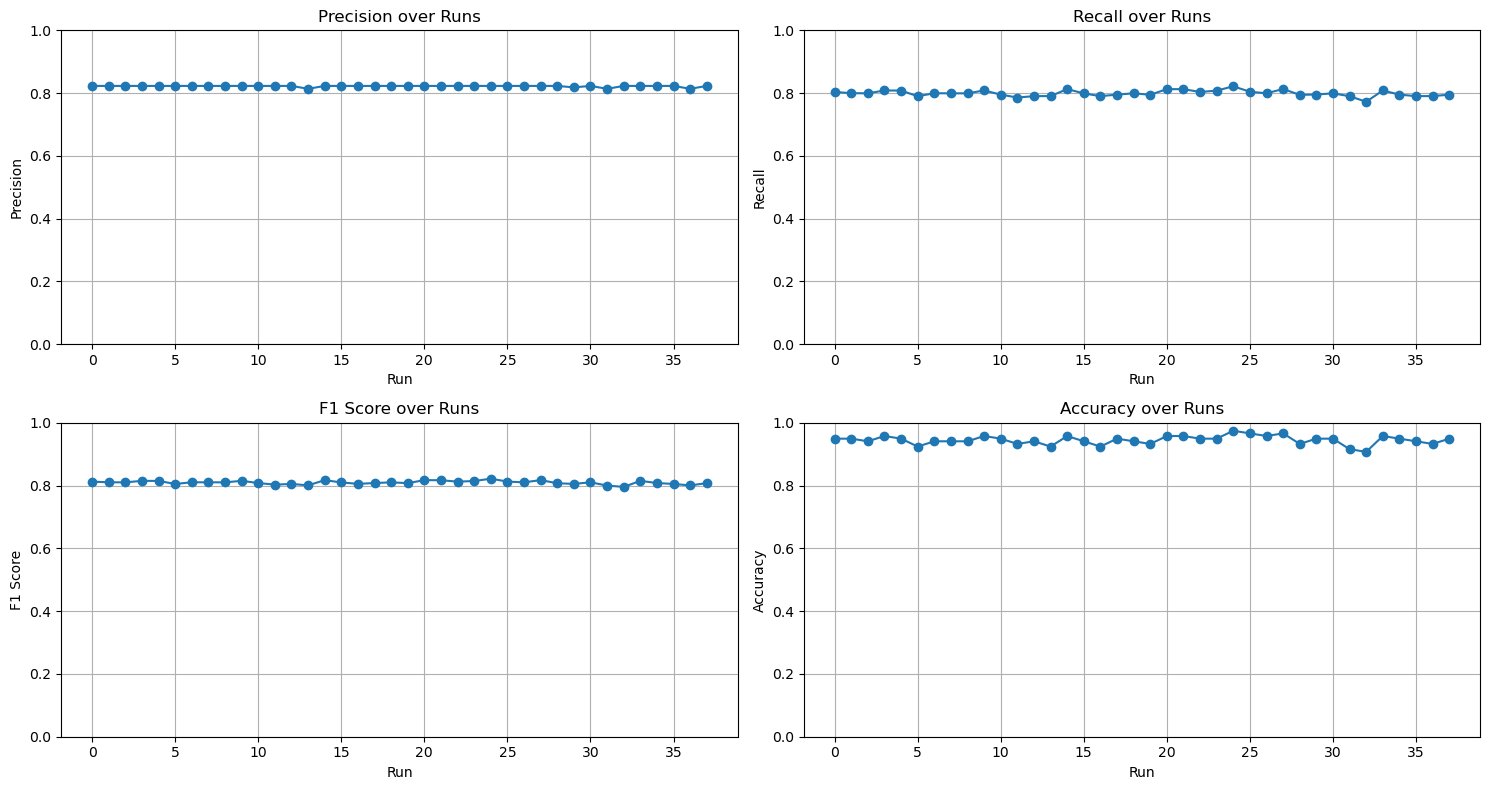

In [43]:
MODEL_NAME = "HYBRID"
get_plot_by_one(HYBRID, MODEL_NAME)

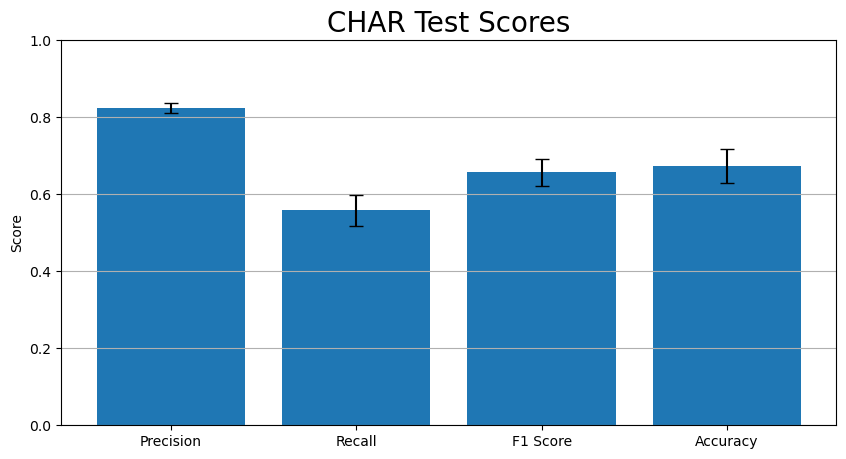

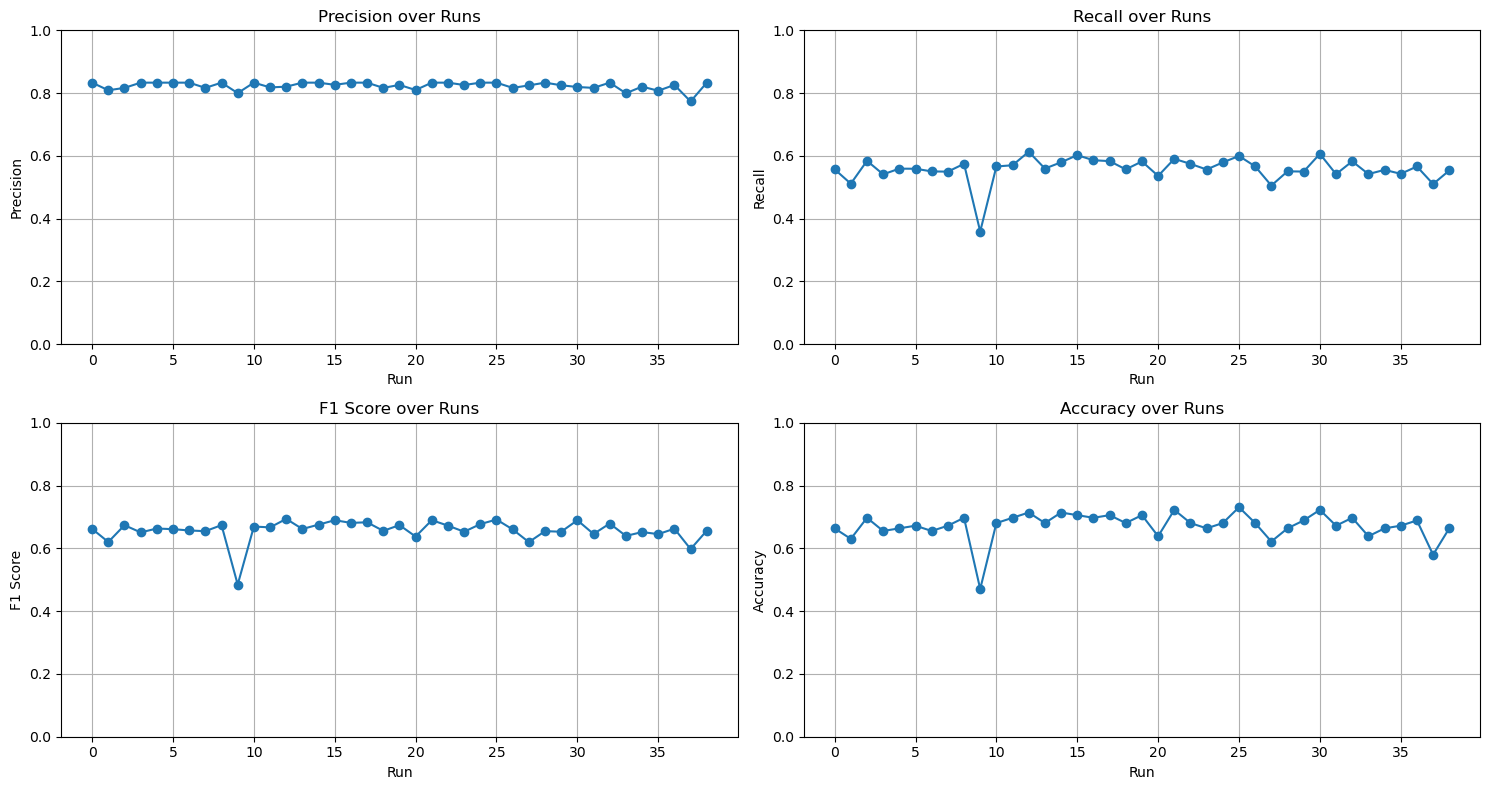

In [44]:
MODEL_NAME = "CHAR"
get_plot_by_one(STRING, MODEL_NAME)

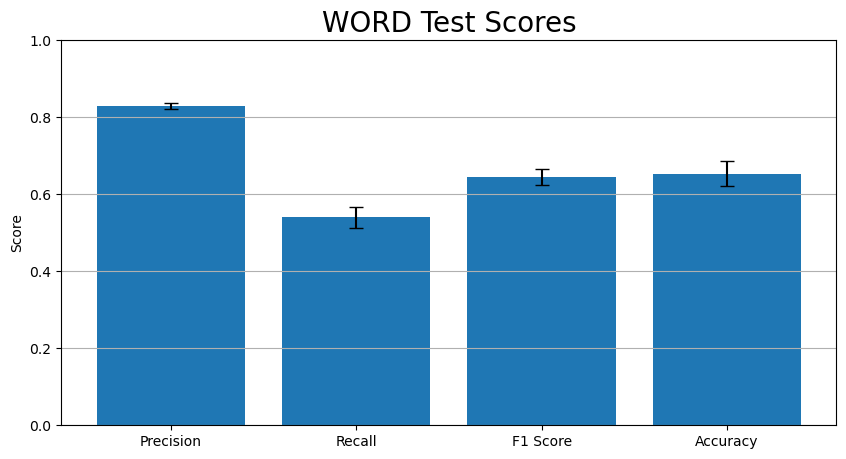

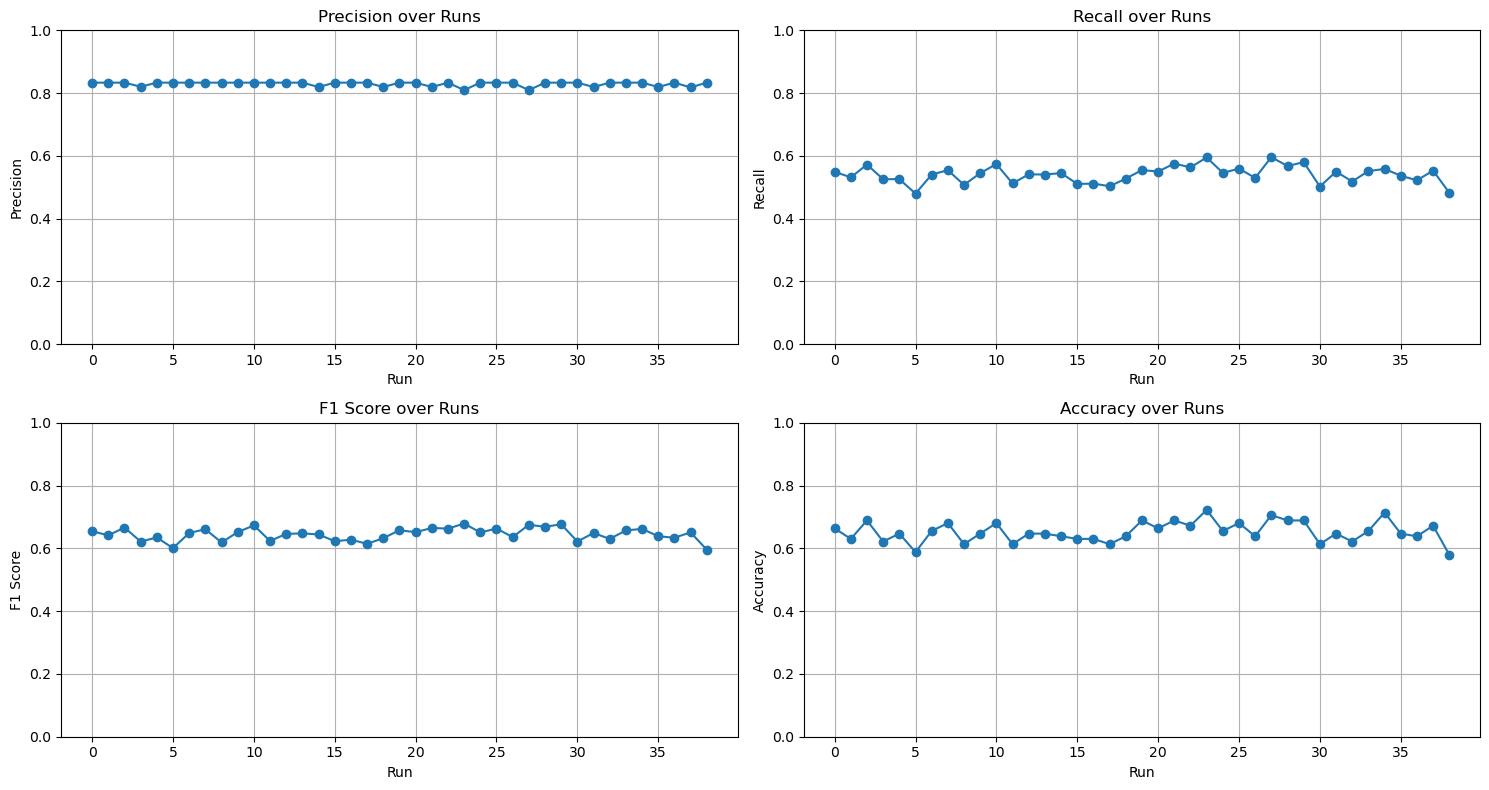

In [45]:
MODEL_NAME = "WORD"
get_plot_by_one(WORD, MODEL_NAME)

In [24]:
## 종합시각화

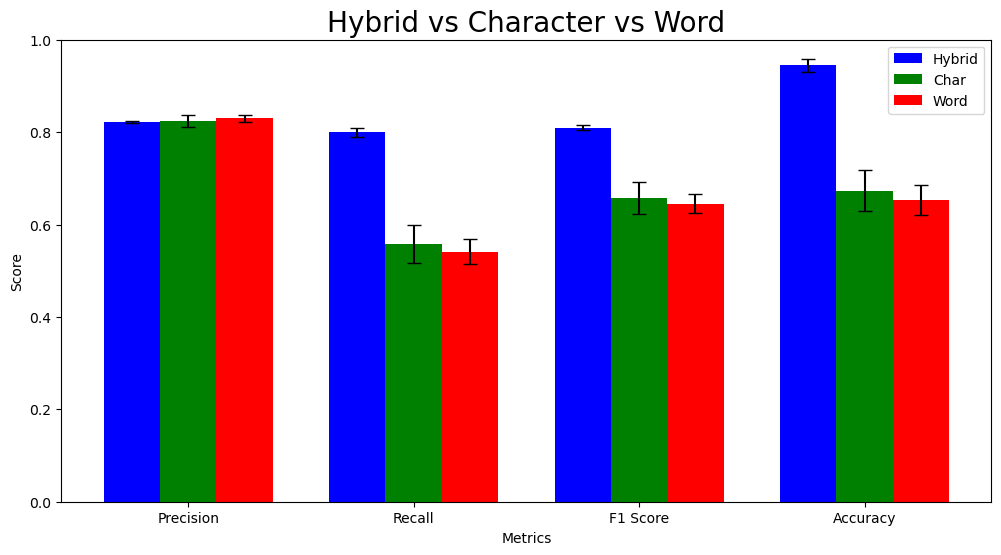

In [34]:
import os
import matplotlib.pyplot as plt
import numpy as np

directories = {
    "Hybrid": HYBRID,
    "Char": STRING,
    "Word": WORD
}

metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy']
colors = ['blue', 'green', 'red']
results = {metric: {model: [] for model in directories.keys()} for metric in metrics}

# 결과 읽기
for model_name, directory in directories.items():
    for txt_name in os.listdir(directory):
        with open(os.path.join(directory, txt_name), "r") as f:
            txt = f.read()
            lines = txt.split("\n")[:4]
            results['Precision'][model_name].append(float(lines[0].split(": ")[1].strip()))
            results['Recall'][model_name].append(float(lines[1].split(": ")[1].strip()))
            results['F1 Score'][model_name].append(float(lines[2].split(": ")[1].strip()))
            results['Accuracy'][model_name].append(float(lines[3].split(": ")[1].strip()))

# 평균 및 표준편차 계산
means = {metric: {model: sum(scores) / len(scores) for model, scores in models.items()} for metric, models in results.items()}
stds = {metric: {model: (sum([(x - means[metric][model]) ** 2 for x in scores]) / len(scores)) ** 0.5 for model, scores in models.items()} for metric, models in results.items()}

# 플롯
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25
index = np.arange(len(metrics))

for i, (model_name, color) in enumerate(zip(directories.keys(), colors)):
    means_list = [means[metric][model_name] for metric in metrics]
    stds_list = [stds[metric][model_name] for metric in metrics]
    ax.bar(index + i * bar_width, means_list, bar_width, yerr=stds_list, capsize=5, label=model_name, color=color)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Hybrid vs Character vs Word',fontsize = 20 )
ax.set_xticks(index + bar_width)
ax.set_xticklabels(metrics)
ax.legend()

# 결과 저장
plot_directory = './plots'
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)
plt.ylim(0, 1)

plt.savefig('plots/#TOTAL_COMPARE.png')
plt.show()
